<a href="https://colab.research.google.com/github/Yewon-dev/DeepLearning-Edu/blob/main/0330_Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# 0. 필요한 라이브러리
from keras.utils import np_utils
from keras.datasets import mnist, cifar10
from keras.models import Sequential, load_model, save_model
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam, SGD
from keras.losses import CategoricalCrossentropy, mse
import numpy as np
import matplotlib.pyplot as plt

In [56]:
from keras.models import save_model # 만든 모델 저장하기

In [16]:
# 손글씨 1 과 7는 1 , 나머지는 0으로 분류하기

(x_train, y_train), (x_test, y_test) = mnist.load_data()
ind = np.random.choice(50000, 50000, replace = False)

tr_ind = ind[:40000]
val_ind = ind[40000:]

train_x = x_train[tr_ind].reshape(-1, 28, 28, 1).astype('float32')/255.
val_x = x_train[val_ind].reshape(-1, 28, 28, 1).astype('float32')/255.
test_x = x_test.reshape(-1, 28, 28, 1).astype('float32')/255.


train_y = y_train[tr_ind]
val_y = y_train[val_ind]

train_y = np.where(train_y == 1, 1,
                   np.where(train_y == 7, 1, 0)).reshape(-1,1)
val_y = np.where(val_y == 1, 1,
                   np.where(val_y == 7, 1, 0)).reshape(-1,1)
test_y = np.where(y_test == 1, 1,
                   np.where(y_test == 7, 1, 0)).reshape(-1,1)

In [17]:
train_y.shape

(40000, 1)

In [18]:
model = Sequential()
model.add(Conv2D(7, kernel_size=(2,2), padding='same',
                 input_shape =(28, 28, 1),
                 activation = 'relu'))
model.add(Dropout(0.2))
model.add(Conv2D(7, kernel_size=(2,2), padding='same', 
                 activation ='relu'))
model.add(Dropout(0.2))

model.add(MaxPooling2D((2,2)))
model.add(Flatten()) # 펴줘야 Dense에 들어감

model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(loss = 'mse', optimizer='sgd', metrics=['accuracy'])

In [20]:
hist = model.fit(train_x, train_y,
          epochs=20, batch_size=50,
          validation_data=(val_x, val_y))

Epoch 1/20
800/800 [==============================] - 3s 3ms/step - loss: 0.1304 - accuracy: 0.8158 - val_loss: 0.0470 - val_accuracy: 0.9535
Epoch 2/20
800/800 [==============================] - 2s 3ms/step - loss: 0.0370 - accuracy: 0.9573 - val_loss: 0.0312 - val_accuracy: 0.9683
Epoch 3/20
800/800 [==============================] - 3s 3ms/step - loss: 0.0281 - accuracy: 0.9656 - val_loss: 0.0261 - val_accuracy: 0.9720
Epoch 4/20
800/800 [==============================] - 3s 3ms/step - loss: 0.0243 - accuracy: 0.9698 - val_loss: 0.0228 - val_accuracy: 0.9765
Epoch 5/20
800/800 [==============================] - 2s 3ms/step - loss: 0.0216 - accuracy: 0.9735 - val_loss: 0.0211 - val_accuracy: 0.9769
Epoch 6/20
800/800 [==============================] - 2s 3ms/step - loss: 0.0192 - accuracy: 0.9767 - val_loss: 0.0193 - val_accuracy: 0.9789
Epoch 7/20
800/800 [==============================] - 2s 3ms/step - loss: 0.0181 - accuracy: 0.9781 - val_loss: 0.0178 - val_accuracy: 0.9814
Epoch 

In [21]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0100 - accuracy: 0.9889


[0.009996256791055202, 0.9889000058174133]

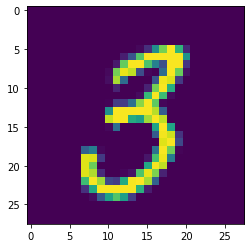

예측값:  [[0]] 실제값:  [0]
Correct!!!!!!


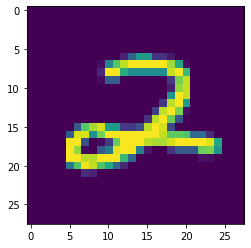

예측값:  [[0]] 실제값:  [0]
Correct!!!!!!


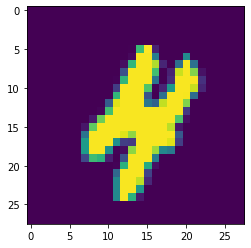

예측값:  [[0]] 실제값:  [0]
Correct!!!!!!


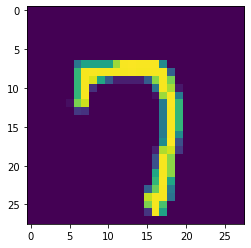

예측값:  [[1]] 실제값:  [1]
Correct!!!!!!


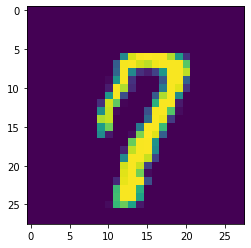

예측값:  [[0]] 실제값:  [1]
Wrong!


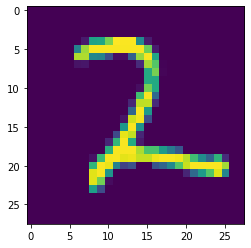

예측값:  [[0]] 실제값:  [0]
Correct!!!!!!


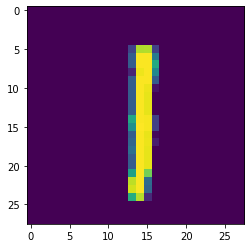

예측값:  [[1]] 실제값:  [1]
Correct!!!!!!


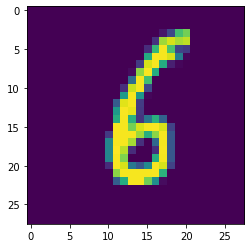

예측값:  [[0]] 실제값:  [0]
Correct!!!!!!


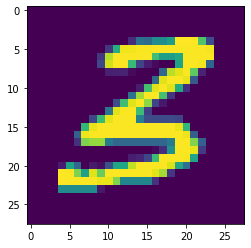

예측값:  [[0]] 실제값:  [0]
Correct!!!!!!


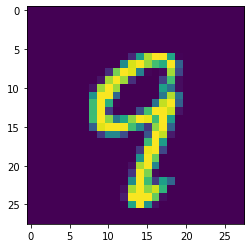

예측값:  [[0]] 실제값:  [0]
Correct!!!!!!


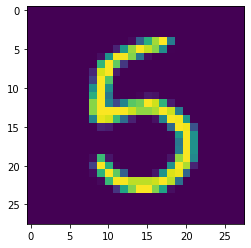

예측값:  [[0]] 실제값:  [0]
Correct!!!!!!


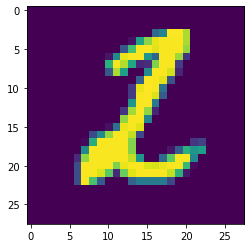

예측값:  [[0]] 실제값:  [0]
Correct!!!!!!


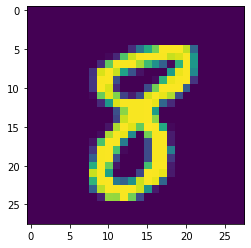

예측값:  [[0]] 실제값:  [0]
Correct!!!!!!


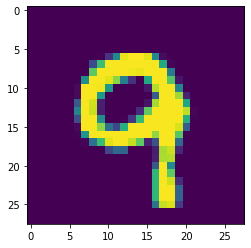

예측값:  [[0]] 실제값:  [0]
Correct!!!!!!


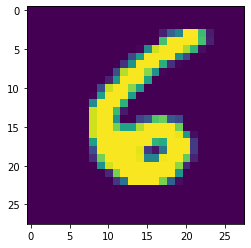

예측값:  [[0]] 실제값:  [0]
Correct!!!!!!


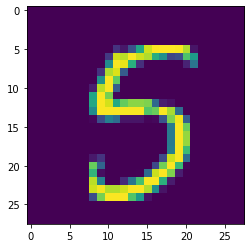

예측값:  [[0]] 실제값:  [0]
Correct!!!!!!


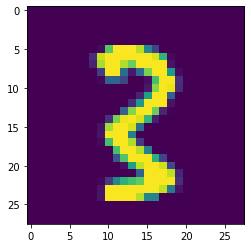

예측값:  [[0]] 실제값:  [0]
Correct!!!!!!


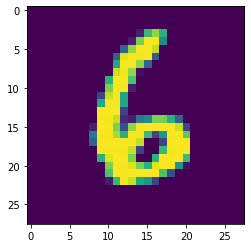

예측값:  [[0]] 실제값:  [0]
Correct!!!!!!


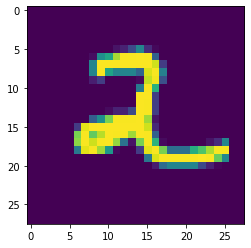

예측값:  [[0]] 실제값:  [0]
Correct!!!!!!


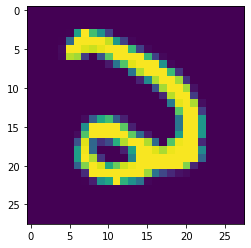

예측값:  [[0]] 실제값:  [0]
Correct!!!!!!


In [55]:
# 모델 활용
test_inds = np.random.choice(10000, 20, replace= False) # 10000까지의 숫자 중에서 20개를 가져와라. replace=false : 중복 X
for test_ind in test_inds:
  plt.imshow(test_x[test_ind].reshape(28,28))
  plt.show()
  real = test_y[test_ind]
  pred = model.predict(test_x[test_ind].reshape(1,28,28,1))
  result = np.where(pred > 0.5 , 1, 0)
  print('예측값: ', result, '실제값: ', real)
  if real == result:
    print('Correct!!!!!!')
  else:
    print('Wrong!')

In [66]:
# 모델 저장
model.save('yewon_first_model.h5')

In [67]:
model1 = load_model('yewon_first_model.h5')

In [70]:
x = np.random.choice(28*28, 28*28).reshape(1,28,28,1)

model1.predict(x)



array([[0.]], dtype=float32)